# CIFAR10 데이터 인식 실습
- 3채널의 32x32 크기 10종의 이미지 데이터
- ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’ 분류

In [4]:
#!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 12.0 MB/s eta 0:00:0000:0100:01


### 데이터셋 로드 및 전처리: torchvision을 사용하여 CIFAR-10 데이터셋을 로드, 데이터를 텐서로 변환한 뒤 정규화

In [49]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

# CIFAR-10 데이터셋 로드 및 전처리
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frag', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer   car horse horse


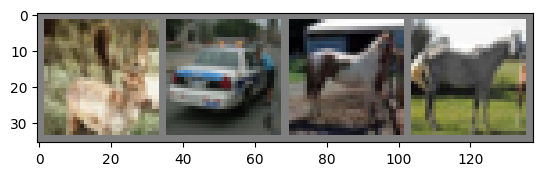

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))


#dataiter = iter(trainloader)
#type(dataiter)
#images, labels = dataiter.next()

images, labels = next(iter(trainloader))

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


### 네트워크 정의: 사용자 정의 Net 클래스를 사용하여 신경망을 정의

In [51]:
import torch.nn as nn
import torch.nn.functional as F

# 네트워크 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


### 손실 함수 및 옵티마이저 설정: 교차 엔트로피 손실 함수와 SGD 옵티마이저를 설정
### 모델 학습: 학습 데이터를 통해 모델을 학습시키고, 매 2000 미니배치마다 손실 값을 출력

In [52]:
import torch.optim as optim


# 손실 함수 및 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

# 모델 학습
for epoch in range(10):     # epoch 10
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data    #학습데이터
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:      # 매 2000 mini-batch 별로 출력
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.300
[1,  8000] loss: 2.296
[1, 10000] loss: 2.287
[1, 12000] loss: 2.253
[2,  2000] loss: 2.127
[2,  4000] loss: 2.058
[2,  6000] loss: 2.000
[2,  8000] loss: 1.966
[2, 10000] loss: 1.928
[2, 12000] loss: 1.899
[3,  2000] loss: 1.830
[3,  4000] loss: 1.810
[3,  6000] loss: 1.770
[3,  8000] loss: 1.733
[3, 10000] loss: 1.712
[3, 12000] loss: 1.675
[4,  2000] loss: 1.640
[4,  4000] loss: 1.623
[4,  6000] loss: 1.599
[4,  8000] loss: 1.546
[4, 10000] loss: 1.567
[4, 12000] loss: 1.530
[5,  2000] loss: 1.534
[5,  4000] loss: 1.504
[5,  6000] loss: 1.491
[5,  8000] loss: 1.485
[5, 10000] loss: 1.445
[5, 12000] loss: 1.437
[6,  2000] loss: 1.430
[6,  4000] loss: 1.393
[6,  6000] loss: 1.416
[6,  8000] loss: 1.407
[6, 10000] loss: 1.400
[6, 12000] loss: 1.367
[7,  2000] loss: 1.347
[7,  4000] loss: 1.359
[7,  6000] loss: 1.344
[7,  8000] loss: 1.330
[7, 10000] loss: 1.317
[7, 12000] loss: 1.326
[8,  2000] loss: 1.292
[8,  4000] 

### 테스트셋 이미지 출력

GroundTruth:    cat  ship  ship plane


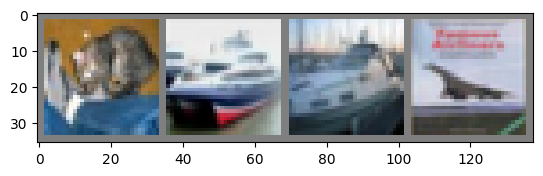

In [53]:
images, labels = next(iter(testloader))

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   car   car plane


### 모델 평가: 테스트 데이터를 사용하여 모델의 정확도를 평가

In [55]:
# 모델 평가
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [56]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 80 %
Accuracy of  bird : 32 %
Accuracy of   cat : 34 %
Accuracy of  deer : 56 %
Accuracy of   dog : 42 %
Accuracy of  frag : 75 %
Accuracy of horse : 63 %
Accuracy of  ship : 60 %
Accuracy of truck : 63 %
